In [1]:
# import sys
import numpy as np
import pickle
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score,confusion_matrix
from MNIST_Dataset_Loader.mnist_loader import MNIST
# import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [6]:
print(pickle.format_version)
import streamlit_drawable_canvas as dra



4.0


In [8]:
print(dra.__version__)

AttributeError: module 'streamlit_drawable_canvas' has no attribute '__version__'

In [2]:
# Load MNIST Data
print('\nLoading MNIST Data...')
data = MNIST('./MNIST_Dataset_Loader/dataset/')


Loading MNIST Data...


In [3]:
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)


Loading Training Data...


In [6]:
train_img[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [7]:
print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


Loading Testing Data...


In [12]:
#Features
X = train_img

#Labels
y = train_labels

# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


Preparing Classifier Training and Validation Data...


In [13]:
# Pickle the Classifier for Future Use
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train,y_train)

SVC(gamma=0.1, kernel='poly')

In [16]:
with open('Digit_class.pickle','wb') as f:
	pickle.dump(clf, f)

In [14]:
# Calculating Accuracy of trained Classifier...
acc = clf.score(X_test,y_test)

In [15]:
#Making Predictions on Validation Data...
y_pred = clf.predict(X_test)

In [10]:
print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nSVM Trained Classifier Accuracy: ',acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


Calculating Accuracy of Predictions...

Creating Confusion Matrix...

SVM Trained Classifier Accuracy:  0.9776666666666667

Predicted Values:  [0 1 3 ... 8 9 0]

Accuracy of Classifier on Validation Images:  0.9776666666666667

Confusion Matrix: 
 [[611   0   2   0   2   2   0   0   1   0]
 [  0 629   4   0   0   0   0   1   1   0]
 [  4   2 579   0   1   1   1   5   4   2]
 [  1   2   3 569   0   7   0   2   2   1]
 [  0   1   1   0 595   0   3   2   2   7]
 [  0   0   1   5   1 495   1   0   1   0]
 [  3   0   2   0   2   3 606   0   0   0]
 [  0   1   1   3   3   1   0 629   1   5]
 [  0   3   1   4   1   4   0   1 598   0]
 [  2   3   0   2   4   2   0   6   0 555]]


In [17]:
# Plot Confusion Matrix Data as a Matrix
# plt.matshow(conf_mat)
# plt.title('Confusion Matrix for Validation Data')
# plt.colorbar()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()

In [18]:
# Making Predictions on Test Input Images...
test_labels_pred = clf.predict(test_img)

In [19]:
print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)


Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9782

Confusion Matrix for Test Data: 
 [[ 972    0    1    1    0    3    1    0    2    0]
 [   0 1127    2    1    0    0    3    0    2    0]
 [   7    0 1006    1    2    0    4    9    3    0]
 [   0    2    2  987    0    5    0    4    6    4]
 [   2    0    2    0  964    0    2    1    1   10]
 [   2    1    1   12    1  862    4    1    5    3]
 [   4    5    2    0    3    6  936    0    2    0]
 [   0    9    8    1    0    0    0 1004    0    6]
 [   6    0    1    4    4    4    1    2  950    2]
 [   4    7    1    5   12    3    0    1    2  974]]


In [20]:
# plt.matshow(conf_mat_test)
# plt.title('Confusion Matrix for Test Data')
# plt.colorbar()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.axis('off')
# plt.show()

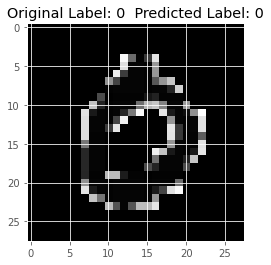

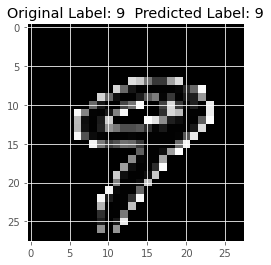

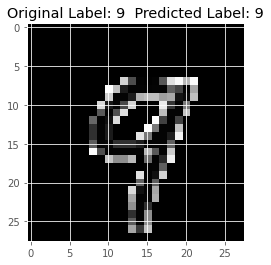

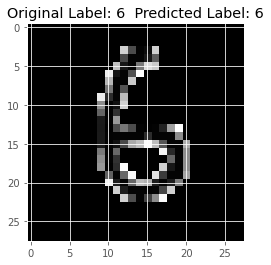

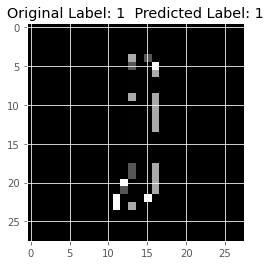

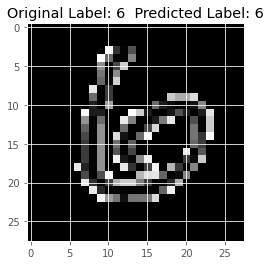

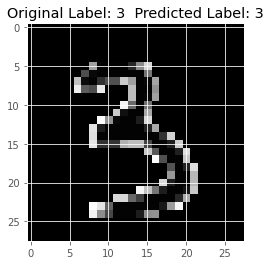

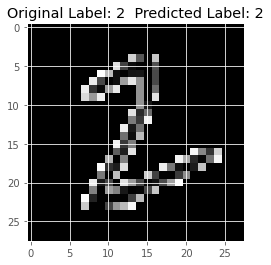

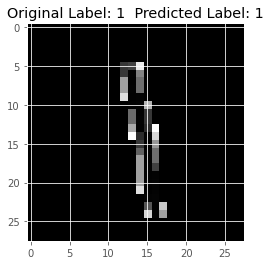

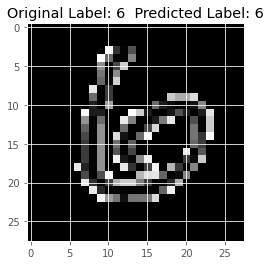

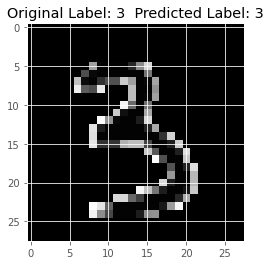

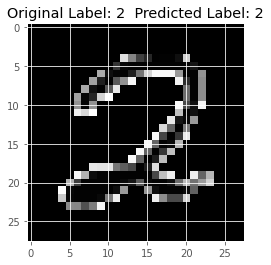

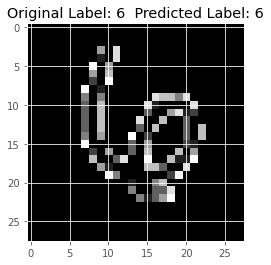

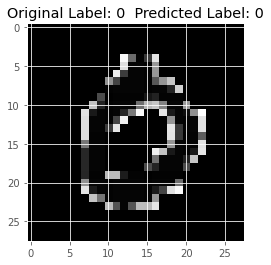

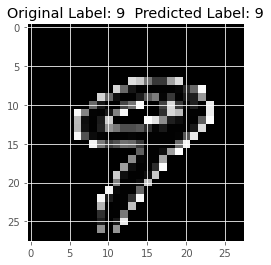

In [21]:
a = np.random.randint(1,40,15)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()